<a href="https://colab.research.google.com/github/akhilnazim0/Data-Science-Project/blob/main/Data_Science_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#read data as dataframe
df = pd.read_csv('/content/drive/MyDrive/Data science project/diabetes_012_health_indicators_BRFSS2015.csv')

 diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


*   **Diabetes**_012 is 0 = no diabetes 1 = prediabetes 2 = diabetes
*   **HighBP** is 0 = no high BP 1 = high BP
*  **HighChol** is 0 = no high cholesterol 1 = high cholesterol
*  **CholCHeck** is 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
*   **Smoker** is Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
*   **Stroke** is (Ever told) you had a stroke. 0 = no 1 = yes
*   **HeartDiseaseorAttack** is coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
*   **PhysActivity** is physical activity in past 30 days - not including job 0 = no 1 = yes
*   **Fruits** is Consume Fruit 1 or more times per day 0 = no 1 = yes
*   **Age** is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 , 9 = 60-64 , 13 = 80 or older


In [3]:
#what does dataframe look like?
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
#To see the dimensions
df.shape


(253680, 22)

In [5]:
#What are the datatype of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#Basic Descriptive
pd.set_option('display.float_format', lambda x: '% 3.f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680,0,1,0,0,0,0,2
HighBP,253680,0,0,0,0,0,1,1
HighChol,253680,0,0,0,0,0,1,1
CholCheck,253680,1,0,0,1,1,1,1
BMI,253680,28,7,12,24,27,31,98
Smoker,253680,0,0,0,0,0,1,1
Stroke,253680,0,0,0,0,0,0,1
HeartDiseaseorAttack,253680,0,0,0,0,0,0,1
PhysActivity,253680,1,0,0,1,1,1,1
Fruits,253680,1,0,0,0,1,1,1


In [7]:
#To find any missing values in dataframe
print(f'The null values in the dataset are\n{df.isna().sum()}')

The null values in the dataset are
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**2. FILTERING**

In [8]:
#Delete/Remove unwanted columns or not usefull to the model
df_f = df.drop(['Income','Education','Veggies','Fruits'],axis=1, )
df_f.shape

(253680, 18)

In [9]:
#finding missing value
df_f.isnull()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#To find which column is missing value or what is the extent of missingness
df_f.isnull().sum()*100/len(df_f)

Diabetes_012             0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                      0
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             0
HvyAlcoholConsump        0
AnyHealthcare            0
NoDocbcCost              0
GenHlth                  0
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Sex                      0
Age                      0
dtype: float64

This means there is no missing value in the columns

In [11]:
#how to check for row Duplication
df_f.duplicated().sum()

80930

In [12]:
#To see the Duplicate rows
df_f.loc[df_f.duplicated(), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
913,0,1,1,1,23,0,0,0,1,0,1,0,3,0,0,0,0,13
1057,0,0,0,1,26,0,0,0,1,0,1,0,2,0,0,0,1,10
1061,0,0,1,1,25,1,0,0,1,0,1,0,2,0,0,0,0,11
1200,0,1,0,1,29,0,0,0,1,0,1,0,2,0,0,0,0,9
1242,2,1,1,1,27,1,0,0,0,0,1,0,5,0,30,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253662,0,0,0,1,16,0,0,0,1,0,1,0,1,0,0,0,0,5
253667,0,1,1,1,28,1,0,0,0,0,1,0,3,0,0,0,0,11
253672,0,1,0,1,30,1,0,1,1,0,1,0,3,0,0,0,1,12
253674,0,0,0,1,27,0,0,0,0,0,1,0,1,0,0,0,0,3


In [13]:
#locating duplicate rows
df_f.loc[df_f.duplicated(keep='last'), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
3,0,1,0,1,27,0,0,0,1,0,1,0,2,0,0,0,0,11
5,0,1,1,1,25,1,0,0,1,0,1,0,2,0,2,0,1,10
7,0,1,1,1,25,1,0,0,1,0,1,0,3,0,0,1,0,11
9,0,0,0,1,24,0,0,0,0,0,1,0,2,0,0,0,1,8
10,2,0,0,1,25,1,0,0,1,0,1,0,3,0,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252946,0,0,0,1,25,0,0,0,1,0,1,0,3,0,0,0,0,2
252980,0,0,0,1,26,0,0,0,1,0,1,0,3,0,0,0,1,6
253034,0,1,0,1,26,0,0,0,0,0,1,0,3,0,0,0,1,10
253138,0,0,0,1,17,0,0,0,1,0,1,0,1,0,7,0,0,1


In [14]:
#Remove Duplicate rows
df_f.drop_duplicates(keep='last').shape

(172750, 18)

In [15]:
df_f['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [16]:
# Define the mapping dictionary for age categories
age_category_map = {
    1: 'Young adults',
    2: 'Young adults',
    3: 'Adults',
    5: 'Adults',
    6: 'Adults',
    7: 'Middle-aged',
    8: 'Middle-aged',
    9: 'Middle-aged',
    10: 'Old',
    11: 'Old',
    12: 'Old',
    13: 'Old'
}

#the age codes to age categories
df_f['Age_Category'] = df_f['Age'].map(age_category_map)

# Display the updated DataFrame
print(df_f)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  AnyHealthcare  \
0                          0   

<Axes: xlabel='Age_Category'>

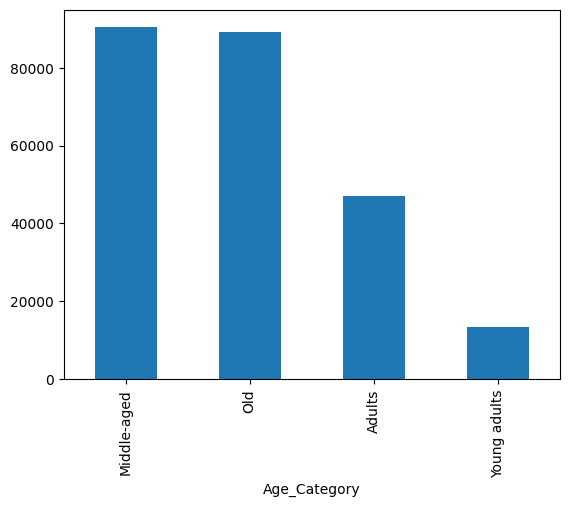

In [17]:
df_f['Age_Category'].value_counts().plot(kind='bar')

# **Pricipal Data Analysis**

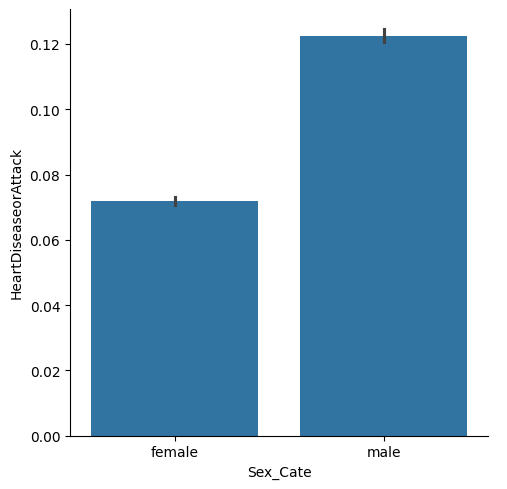

In [24]:
#creating Sex category
df_f['Sex_Cate'] = df_f['Sex'].replace([0.0,1.0],['female','male'])
df_f.groupby('Sex_Cate')['HeartDiseaseorAttack'].mean()
sns.catplot(data=df_f, y='HeartDiseaseorAttack', x='Sex_Cate', kind='bar')
plt.show()


In [28]:
# Convert 'Sex_Cate' to numeric
df_f_encoded = pd.get_dummies(df_f, columns=['Age_Category','Sex_Cate'], drop_first=True)

# Re-separate features and target variable after encoding
X = df_f_encoded.drop('HeartDiseaseorAttack', axis=1)
y = df_f_encoded['HeartDiseaseorAttack']

# Verify all columns in X are numeric
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows and data types to confirm encoding
print(X.head())
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Diabetes_012                 float64
HighBP                       float64
HighChol                     float64
CholCheck                    float64
BMI                          float64
Smoker                       float64
Stroke                       float64
PhysActivity                 float64
HvyAlcoholConsump            float64
AnyHealthcare                float64
NoDocbcCost                  float64
GenHlth                      float64
MentHlth                     float64
PhysHlth                     float64
DiffWalk                     float64
Sex                          float64
Age                          float64
Age_Category_Middle-aged        bool
Age_Category_Old                bool
Age_Category_Young adults       bool
Sex_Cate_male                   bool
dtype: object
   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2 

In [29]:
# Initialize PCA
pca = PCA(n_components=11)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['HighBP', 'HighChol','HeartDiseaseorAttack','CholCheck','BMI','Diabetes_012','Smoker','Stroke','Sex','PhysHlth','HvyAlcoholConsump'])
df_pca['HeartDiseaseorAttack'] = y.reset_index(drop=True)


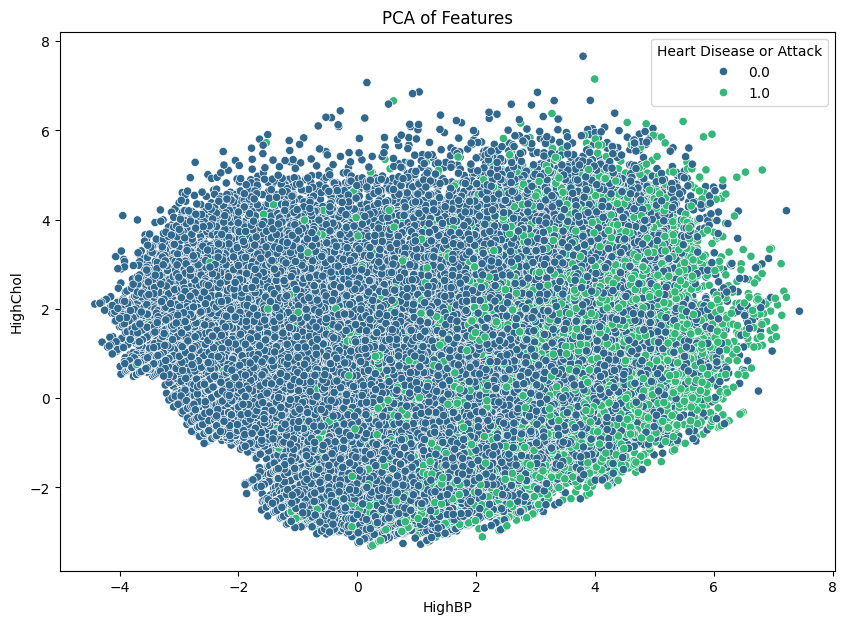

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='HighBP', y='HighChol', hue='HeartDiseaseorAttack', data=df_pca, palette='viridis')
plt.title('PCA of Features')
plt.xlabel('HighBP')
plt.ylabel('HighChol')
plt.legend(title='Heart Disease or Attack')
plt.show()


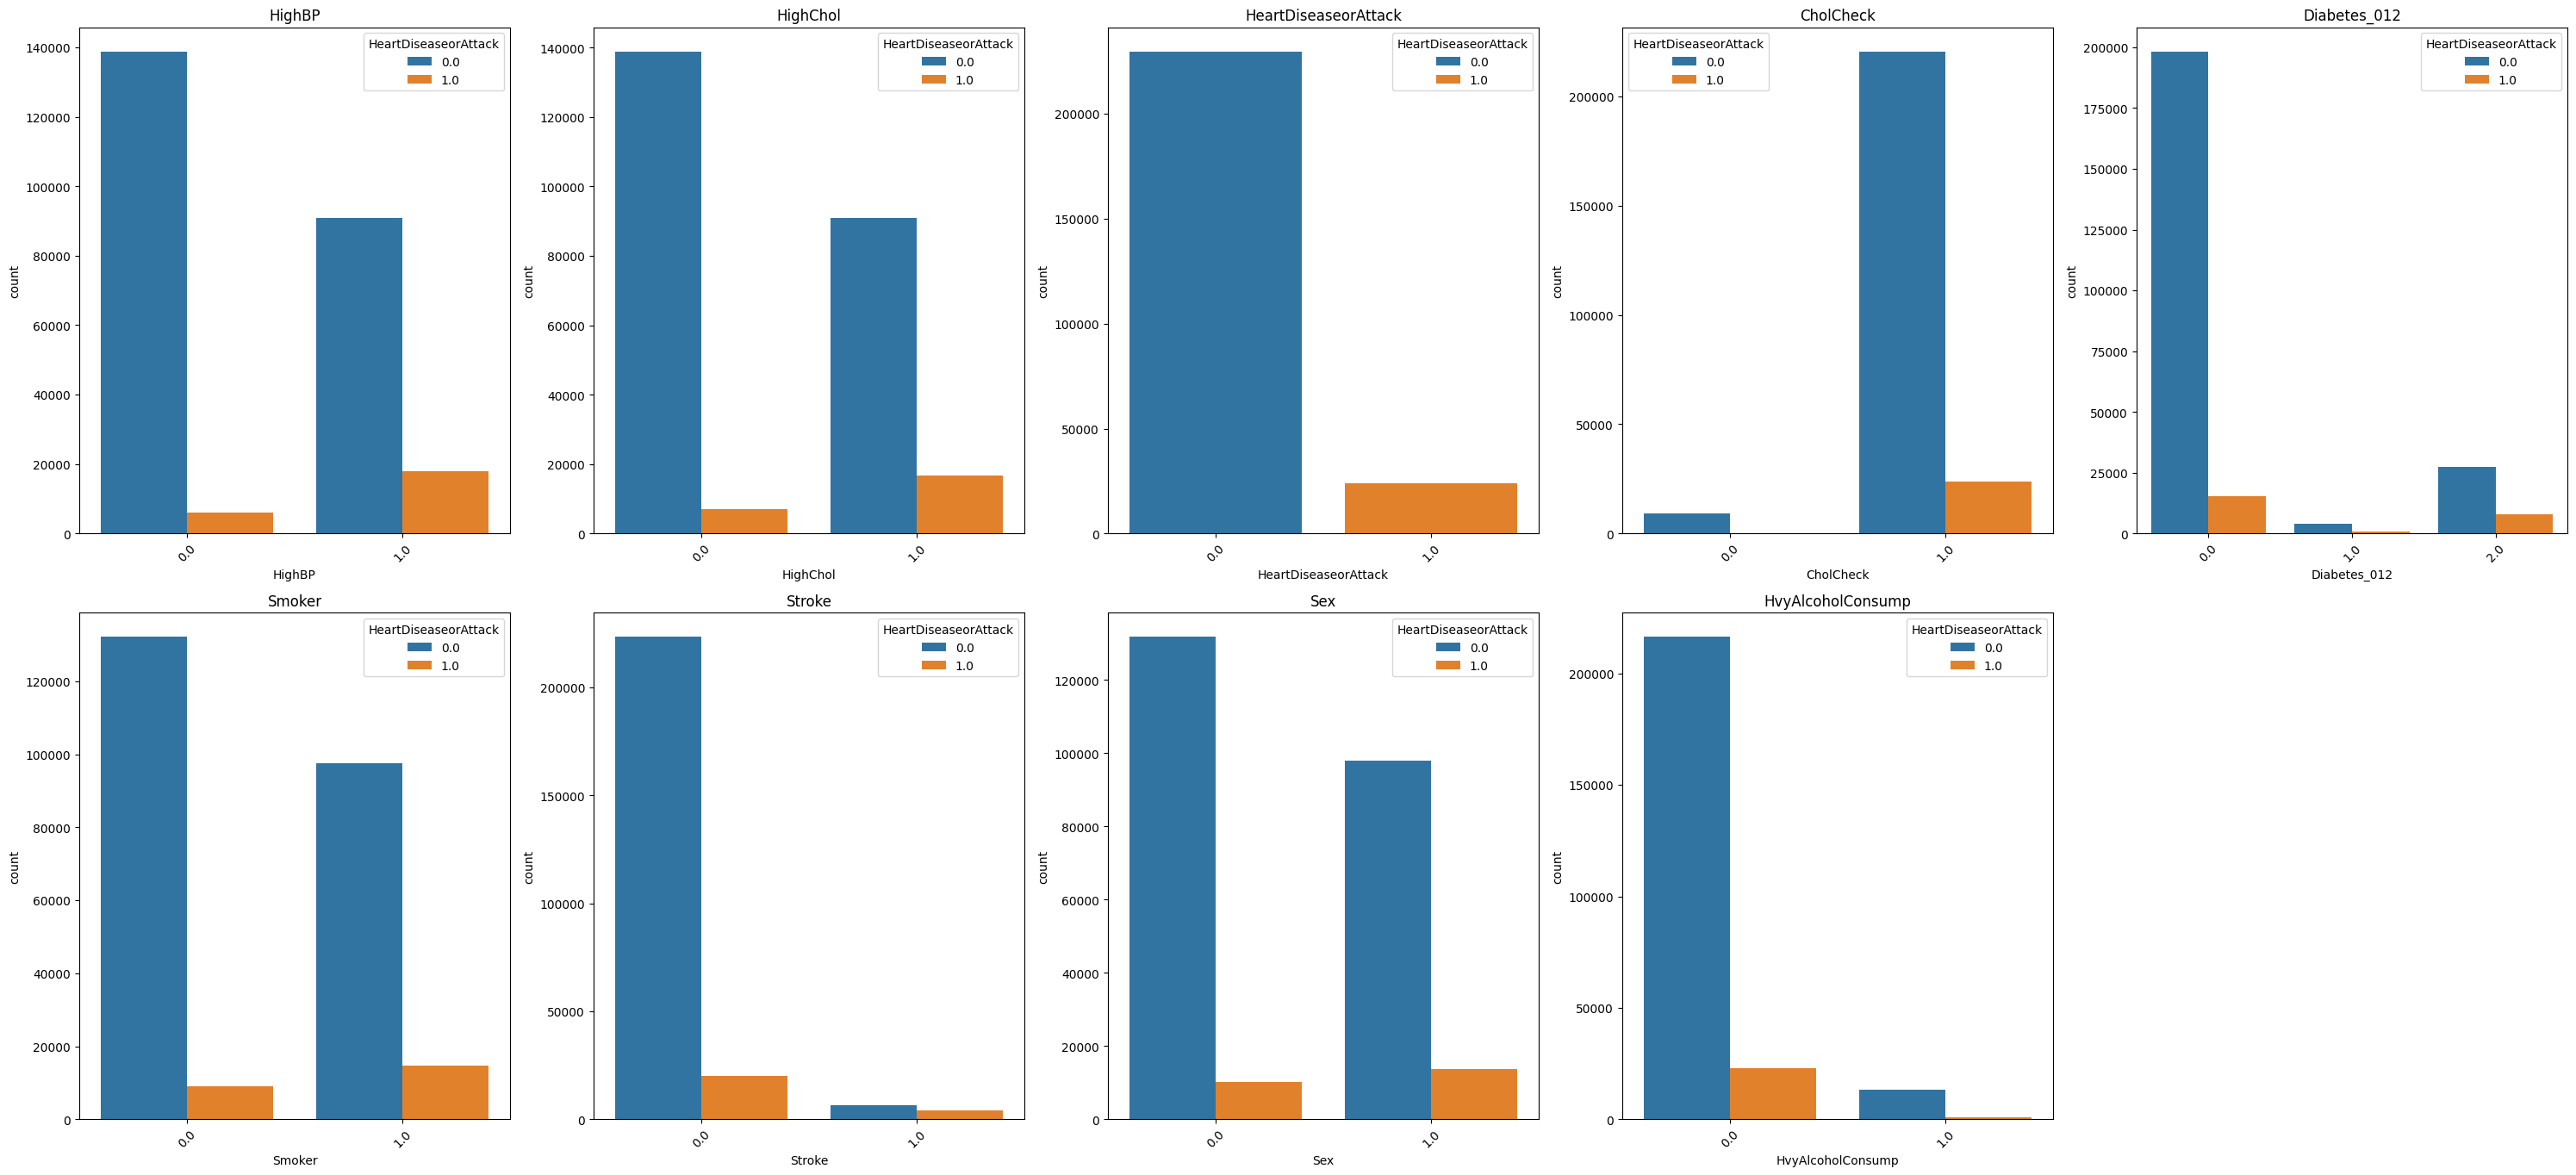

In [39]:
# Specify the columns you want to plot
columns_to_plot = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'CholCheck',
                    'Diabetes_012', 'Smoker', 'Stroke', 'Sex',  'HvyAlcoholConsump']

# Create a subset of the DataFrame with the selected columns
df_subset = df_f[columns_to_plot]

# Create the figure and axes
plt.figure(figsize=(30, 20))  # Adjust figure size as needed

# Loop through the columns and create a subplot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=column, hue="HeartDiseaseorAttack", data=df_f)
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

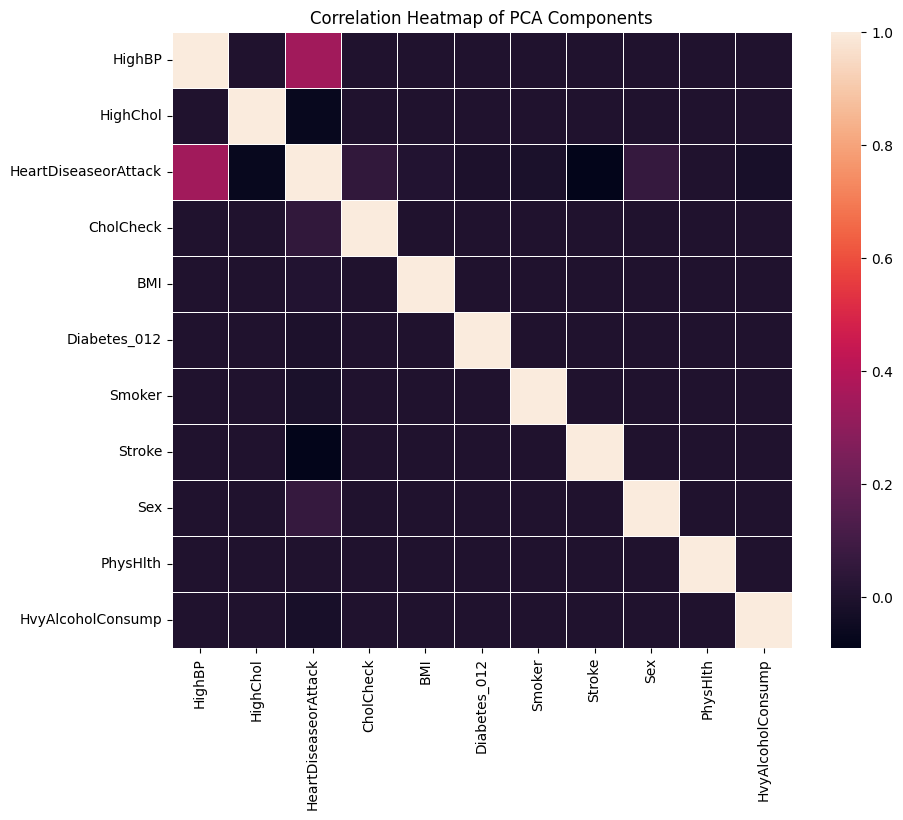

In [46]:
# Calculate the correlation matrix
corr_matrix_pca = df_pca.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PCA Components')
plt.show()

In [75]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('HeartDiseaseorAttack', axis=1), df_pca['HeartDiseaseorAttack'], test_size=0.3, random_state=42)
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# **Generating Machine Learning Models**

In [76]:
# Model 1
model_1 = LogisticRegression()  # Handle imbalance
model_1.fit(X_resampled, y_resampled)
y_pred = model_1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     69007
         1.0       0.23      0.78      0.36      7097

    accuracy                           0.74     76104
   macro avg       0.60      0.76      0.60     76104
weighted avg       0.90      0.74      0.79     76104

[[50786 18221]
 [ 1545  5552]]


In [72]:
# Model 2
model_2 = RandomForestClassifier()
model_2.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     69007
         1.0       0.28      0.46      0.35      7097

    accuracy                           0.84     76104
   macro avg       0.61      0.67      0.63     76104
weighted avg       0.88      0.84      0.86     76104

[[60676  8331]
 [ 3857  3240]]


In [73]:
# Model 3
model_3= KNeighborsClassifier()
model_3.fit(X_resampled, y_resampled)
y_pred = model_3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     69007
         1.0       0.23      0.54      0.32      7097

    accuracy                           0.78     76104
   macro avg       0.58      0.67      0.59     76104
weighted avg       0.88      0.78      0.82     76104

[[55927 13080]
 [ 3289  3808]]


In [74]:
#model 4
model_4 = MLPClassifier(max_iter=1000)  # Handle imbalance
model_4.fit(X_resampled, y_resampled)
y_pred = model_4.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     69007
         1.0       0.23      0.80      0.36      7097

    accuracy                           0.73     76104
   macro avg       0.60      0.76      0.59     76104
weighted avg       0.90      0.73      0.78     76104

[[49790 19217]
 [ 1403  5694]]
